In [1]:
import pandas as pd
from scipy.spatial.distance import euclidean
import math


In [2]:
# read csv into dataframe
df = pd.read_csv('../result_train.csv')

# update loss on cell if loss type is l1_loss
for index, row in df.iterrows():
    if row['CostFunc'] == 'l1_loss':
        df.at[index, 'AvgCost'] = row['AvgCost']**2

# sort dataframe based on AvgCost column in ascending order
df = df.sort_values(by='AvgCost')

# save updated dataframe as csv file
df.to_csv('result_sorted_loss.csv', index=False)

# print message indicating success
print('Updated dataframe saved to result_sorted_loss.csv')


Updated dataframe saved to result_sorted_loss.csv


In [3]:
def modified_euclidean_distance(x, y):
    distance = 0
    for i in range(0,len(x)):
        if x[i] == 0.0:
            x[i] = 1e-10
        if y[i] == 0.0:
            y[i] = 1e-10
        r = ((x[i] - y[i]) ** 2) * (max(x[i]/y[i], y[i]/x[i]) ** 2)
        distance += r

    
    return math.sqrt(distance)


def scientific_to_float(scientific_notation):
    parts = scientific_notation.split('e')
    if len(parts) == 1:
        return float(parts[0])
    else:
        a, b = parts[0], int(parts[1])
        if '.' in a:
            c = len(a) - a.index('.') - 1
            a = a.replace('.', '')
            b -= c
        if b < 0:
            return float(a) / (10 ** abs(b))
        else:
            return float(a) * (10 ** b)

In [4]:


# read csv into dataframe
df = pd.read_csv('result_sorted_loss.csv')

# define known parameters as a list
known_params = [0.01, 55, 0.1, 55, 0.125, 0.0125, 65, 4]

# calculate Euclidean distance between known parameters and BestSol1 column for each row
distances = []
for x in df['BestSol1']:
    params = list(map(scientific_to_float, x.strip('[]').split()))
    distance = modified_euclidean_distance(known_params, params) 
    distances.append(distance)

df['dist_to_known_params'] = distances

# sort dataframe based on distance to known parameters in ascending order
df = df.sort_values(by='dist_to_known_params')

# save updated dataframe as csv file
df.to_csv('result_sorted_gt.csv', index=False)

# print message indicating success
print('Updated dataframe saved to result_sorted_gt.csv')

Updated dataframe saved to result_sorted_gt.csv


In [5]:
import pandas as pd

# Load the original CSV
df = pd.read_csv('result_sorted_loss.csv')

# Create two dataframes: first 10 rows and the rest
good_runs = df.head(2)
bad_runs = df.tail(len(df)-2)  # or simply: bad_runs = df[10:]

# Save these dataframes to new CSV files
good_runs.to_csv('GoodRuns.csv', index=False)
bad_runs.to_csv('BadRuns.csv', index=False)



In [6]:

# read CSV file
df_good = pd.read_csv('GoodRuns.csv')
df_bad = pd.read_csv('BadRuns.csv')

# initialize a list of 8 zeros to store the sum for each parameter
param_sum_BestSol1 = [0] * 8

# iterate over each row in the BestSol1 column
for x in df_good['BestSol1']:
    # convert the scientific notation string to a list of floats
    params = list(map(scientific_to_float, x.strip('[]').split()))
    # add the values of each parameter to the running total
    for i in range(len(params)):
        param_sum_BestSol1[i] += params[i]

# divide each sum by the number of rows to get the mean
num_rows = len(df_good)
param_mean_good_BestSol1 = [x / num_rows for x in param_sum_BestSol1]


# initialize a list of 8 zeros to store the sum for each parameter
param_sum_BestSol1 = [0] * 8

# iterate over each row in the BestSol1 column
for x in df_bad['BestSol1']:
    # convert the scientific notation string to a list of floats
    params = list(map(scientific_to_float, x.strip('[]').split()))
    # add the values of each parameter to the running total
    for i in range(len(params)):
        param_sum_BestSol1[i] += params[i]

# divide each sum by the number of rows to get the mean
num_rows = len(df_bad)
param_mean_bad_BestSol1 = [x / num_rows for x in param_sum_BestSol1]


print(f"Mean Good Reuslts (AvgCost < 1e-5):")
print(param_mean_good_BestSol1)
print()
print(f"Mean Bad Reuslts (AvgCost > 1e-5):")
print(param_mean_bad_BestSol1)


Mean Good Reuslts (AvgCost < 1e-5):
[0.002984631535, 22.03186845, 0.130983616, 21.8994556, 0.121516932, 0.0187672408, 54.4597733, 2.136860475]

Mean Bad Reuslts (AvgCost > 1e-5):
[0.003068472601270901, 28.789130380434784, 0.32381822904311036, 41.75227353157192, 0.11044266770468229, 0.021042934262876265, 34.13504932276788, 3.3018540363244164]


In [7]:
import pandas as pd
import numpy as np

# read CSV file
df_good = pd.read_csv('GoodRuns.csv')
df_bad = pd.read_csv('BadRuns.csv')

# initialize a list of 8 zeros to store the sum for each parameter
param_sum = [0] * 8
param_values = [[] for _ in range(8)]  # List to store values for calculating median

# iterate over each row in the five columns (BestSol1, BestSol2, BestSol3, BestSol4, BestSol5)
for col in ['BestSol1', 'BestSol2', 'BestSol3', 'BestSol4', 'BestSol5']:
    for x in df_good[col]:
        # convert the scientific notation string to a list of floats
        params = list(map(float, x.strip('[]').split()))
        # add the values of each parameter to the running total and store for calculating median
        for i in range(len(params)):
            param_sum[i] += params[i]
            param_values[i].append(params[i])

# divide each sum by the number of rows and the number of columns to get the mean
num_rows = len(df_good)
num_cols = 5
param_mean_good = [x / (num_rows * num_cols) for x in param_sum]

# calculate the median for each parameter
param_median_good = [np.median(values) for values in param_values]


# initialize a list of 8 zeros to store the sum for each parameter
param_sum = [0] * 8
param_values = [[] for _ in range(8)]  # List to store values for calculating median

# iterate over each row in the five columns (BestSol1, BestSol2, BestSol3, BestSol4, BestSol5)
for col in ['BestSol1', 'BestSol2', 'BestSol3', 'BestSol4', 'BestSol5']:
    for x in df_bad[col]:
        # convert the scientific notation string to a list of floats
        params = list(map(float, x.strip('[]').split()))
        # add the values of each parameter to the running total and store for calculating median
        for i in range(len(params)):
            param_sum[i] += params[i]
            param_values[i].append(params[i])

# divide each sum by the number of rows and the number of columns to get the mean
num_rows = len(df_bad)
num_cols = 5
param_mean_bad = [x / (num_rows * num_cols) for x in param_sum]

# calculate the median for each parameter
param_median_bad = [np.median(values) for values in param_values]

print(f"Mean Good Reuslts (AvgCost < 10e-5):")
print(param_mean_good)
print(f"Median Good Reuslts (AvgCost < 10e-5):")
print(param_median_good)
print()
print(f"Mean Bad Reuslts (AvgCost > 10e-5):")
print(param_mean_bad)
print(f"Median Good Reuslts (AvgCost < 10e-5):")
print(param_median_bad)
print()


Mean Good Reuslts (AvgCost < 10e-5):
[0.002984631535, 21.849286409999998, 0.12998761108999998, 21.6936765, 0.1218249706, 0.0187672408, 54.53883974999999, 2.131086186]
Median Good Reuslts (AvgCost < 10e-5):
[0.002984631535, 21.7039561, 0.130983616, 21.733336, 0.120130519, 0.0187672408, 53.37271435, 2.12152621]

Mean Bad Reuslts (AvgCost > 10e-5):
[0.0030742281302742498, 28.997256414358485, 0.31623532236852864, 42.528426070909724, 0.11072976129678928, 0.021111940239464888, 34.073600591587535, 3.323364966527752]
Median Good Reuslts (AvgCost < 10e-5):
[0.00334103689, 30.4051223, 0.231613311, 32.4223499, 0.0827324153, 0.0204478539, 27.7341706, 2.96568388]



In [8]:
import pandas as pd
import numpy as np

# Function to process the data
def process_data(file_name):
    # read CSV file
    df = pd.read_csv(file_name)

    # initialize empty NumPy arrays for each parameter
    param_arr = [np.empty(len(df)) for _ in range(8)]

    # iterate over each row in the five columns (BestSol1, BestSol2, BestSol3, BestSol4, BestSol5)
    for col in ['BestSol1', 'BestSol2', 'BestSol3', 'BestSol4', 'BestSol5']:
        for row_idx, x in enumerate(df[col]):
            # convert the scientific notation string to a list of floats
            params = list(map(float, x.strip('[]').split()))
            # assign each parameter to the corresponding NumPy array
            for i in range(8):
                param_arr[i][row_idx] = params[i]

    for i in range(len(param_arr)):
        param_arr[i] = np.copy(param_arr[i])
        param_arr[i] = np.delete(param_arr[i], np.where(param_arr[i] < 0))

    return param_arr

# process the data for both files
good_runs_param_arr = process_data('GoodRuns.csv')
bad_runs_param_arr = process_data('BadRuns.csv')

# Now good_runs_param_arr and bad_runs_param_arr each hold a list of 8 NumPy arrays,
# corresponding to the parameters for the good runs and bad runs respectively.



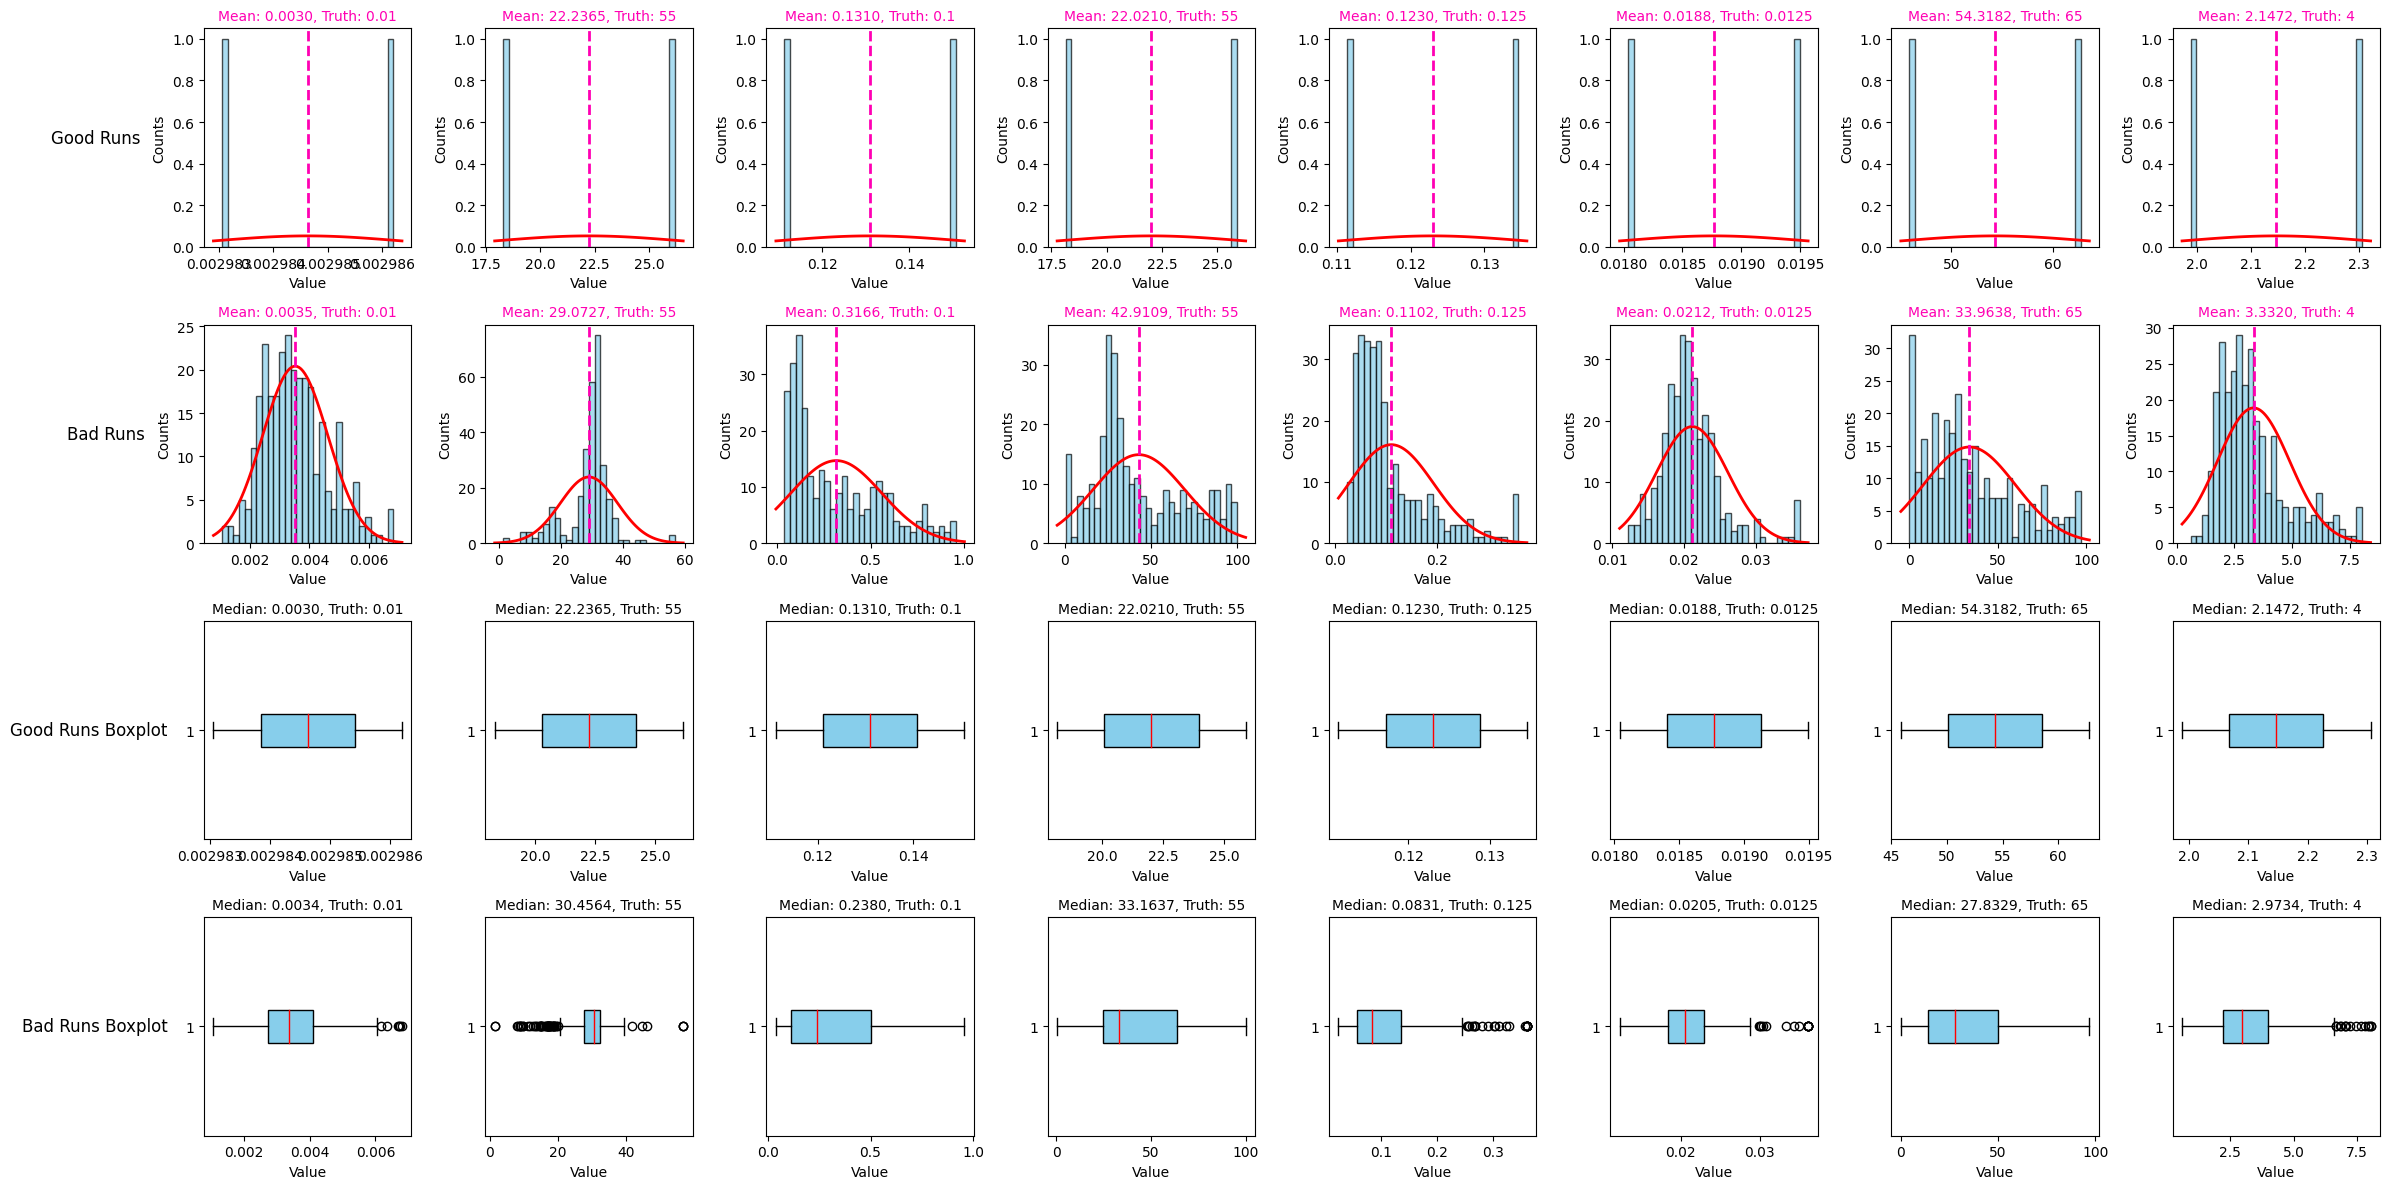

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


def plot_histograms_and_boxplots(param_arr_good, param_arr_bad, ground_truth):
    # Create subplots for each parameter
    fig, axs = plt.subplots(4, 8, figsize=(24, 12))  # Added 2 more rows for boxplots
    
    # Define labels for the rows
    row_labels = ['Good Runs', 'Bad Runs']
    boxplot_labels = ['Good Runs Boxplot', 'Bad Runs Boxplot']
    
    # Number of bins
    n_bins = 30
    
    # Plot histograms and fitted Gaussian curves for each parameter
    for j, param_arr in enumerate([param_arr_good, param_arr_bad]):
        for i, arr in enumerate(param_arr):
            mu, std = norm.fit(arr)

            # Clip the data to be within 3 standard deviations from the mean
            clipped_arr = np.clip(arr, a_min=mu-3*std, a_max=mu+3*std)

            # Plot histogram
            n, bins, patches = axs[j,i].hist(clipped_arr, bins=n_bins, density=False, alpha=0.7, color='skyblue', edgecolor='black')

            # Calculate bin width
            bin_width = bins[1] - bins[0]

            # Plot fitted Gaussian curve, adjust for count scale and bin width
            xmin, xmax = axs[j,i].get_xlim()
            x = np.linspace(xmin, xmax, 100)
            p = norm.pdf(x, mu, std) * len(clipped_arr) * bin_width
            axs[j,i].plot(x, p, 'r', linewidth=2)

            # Add vertical line at the mean
            axs[j,i].axvline(mu, color='#FF00B3', linestyle='dashed', linewidth=2)

            # Set plot title and labels
            title_text = "Mean: {:.4f}, Truth: {}".format(mu, ground_truth[i])
            title = axs[j,i].set_title(title_text, fontsize=10)
            title.set_color('#FF00B3')
            axs[j,i].set_xlabel('Value')
            axs[j,i].set_ylabel('Counts')

            # Label the rows
            if i == 0:
                axs[j,i].annotate(row_labels[j], xy=(0, 0.5), xytext=(-axs[j,i].yaxis.labelpad - 5, 0),
                                  xycoords=axs[j,i].yaxis.label, textcoords='offset points',
                                  size='large', ha='right', va='center')

            # Plot boxplots
            median = np.median(clipped_arr)
            median_str = "Median: {:.4f}, Truth: {}".format(median, ground_truth[i])
            box = axs[j+2,i].boxplot(clipped_arr, vert=False, patch_artist=True)  # Plot horizontal boxplots
            axs[j+2,i].set_xlabel('Value')
            axs[j+2,i].set_title(median_str, fontsize=10)

            # Set colors
            box['boxes'][0].set_facecolor('skyblue')
            box['medians'][0].set_color('red')

            # Label the boxplot rows
            if i == 0:
                axs[j+2,i].annotate(boxplot_labels[j], xy=(0, 0.5), xytext=(-axs[j+2,i].yaxis.labelpad - 5, 0),
                                    xycoords=axs[j+2,i].yaxis.label, textcoords='offset points',
                                    size='large', ha='right', va='center')

    # Adjust spacing between subplots
    fig.tight_layout()

    # Show the plot
    plt.show()

# Define the ground truth values
ground_truth = [0.01, 55, 0.1, 55, 0.125, 0.0125, 65, 4]

# Call the function with the parameter arrays for both good and bad runs and the ground truth values
plot_histograms_and_boxplots(good_runs_param_arr, bad_runs_param_arr, ground_truth)


In [10]:
import seaborn as sns

def plot_kde(param_arr_good, param_arr_bad, ground_truth):
    # Create subplots for each parameter
    fig, axs = plt.subplots(2, 8, figsize=(24, 6))
    
    # Define labels for the rows
    row_labels = ['Good Runs', 'Bad Runs']
    
    # Plot KDEs for each parameter
    for j, param_arr in enumerate([param_arr_good, param_arr_bad]):
        for i, arr in enumerate(param_arr):
            # Calculate mean
            mu = np.mean(arr)

            # Plot KDE
            sns.kdeplot(arr, ax=axs[j,i], fill=True)

            # Add vertical line at the mean
            axs[j,i].axvline(mu, color='orange', linestyle='dashed', linewidth=3)

            # Set plot title and labels
            title_text = "Mean: {:.4f}, Truth: {}".format(mu, ground_truth[i])
            title = axs[j,i].set_title(title_text, fontsize=10)
            title.set_color('blue')
            axs[j,i].set_xlabel('Value')
            axs[j,i].set_yticks([]) # This line removes the y-axis labels

            # Label the rows
            if i == 0:
                axs[j,i].annotate(row_labels[j], xy=(0, 0.5), xytext=(-axs[j,i].yaxis.labelpad - 5, 0),
                                  xycoords=axs[j,i].yaxis.label, textcoords='offset points',
                                  size='large', ha='right', va='center')

    # Adjust spacing between subplots
    fig.tight_layout()

    # Show the plot
    plt.show()

# Define the ground truth values
ground_truth = [0.01, 55, 0.1, 55, 0.125, 0.0125, 65, 4]

# Call the function with the parameter arrays for both good and bad runs and the ground truth values
plot_kde(good_runs_param_arr, bad_runs_param_arr, ground_truth)


In [ ]:
# import pandas as pd
# import seaborn as sns

# def numpy_string_to_list(numpy_string):
#     numpy_string = numpy_string.strip('[]')  # remove brackets
#     string_list = numpy_string.split()  # split by spaces
#     return list(map(float, string_list))  # convert to floats and return as a list


# df = pd.read_csv('GoodRuns.csv')

# import ast

# # First, we need to convert string representations of lists into actual list objects
# df['BestSol1'] = df['BestSol1'].apply(numpy_string_to_list)

# # Now, we can split the 'BestSol1' column into separate columns for each parameter
# params = df['BestSol1'].apply(pd.Series)
# params.columns = [f'c[{i}]' for i in range(8)]

# # Now we compute the correlation matrix.
# corr = params.corr()

# # And finally, we create the pairplot.
# sns.pairplot(params, diag_kind='False')



In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Create a mask for the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=bool))

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=False, cmap=cmap, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# plt.title('Correlation Heatmap', fontsize=20)
# plt.show()



[0.0030156054950000004, 30.317151290000005, 0.17772695107, 60.75459434, 0.17996989480999998, 0.021295677790000002, 47.772887753999996, 2.557713123]


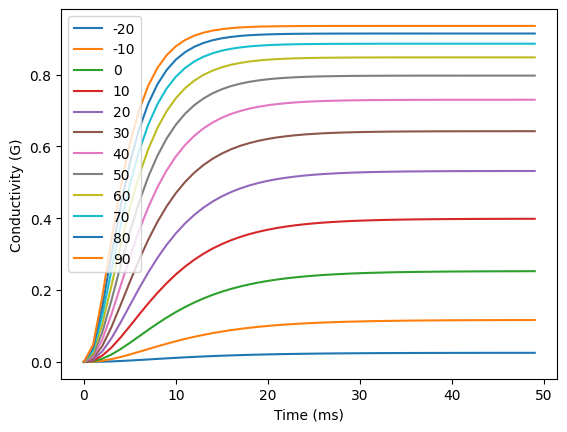

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

C = param_mean_good
print(C)
def alpha_n(V):
    result_alpha = (C[0] * (V + C[1])) / (1 - np.exp(-C[2] * (V + C[3])))
    return result_alpha

def beta_n(V):
    result_beta = C[4] * (np.exp(-C[5] * ( V + C[6] )))
    return result_beta

def n_inf(alpha, beta):
    result_n_inf =  alpha / (alpha + beta)
    return result_n_inf

def tau_n(alpha, beta):
    result_tau = 1 / (alpha + beta)
    return result_tau

def n_pow_4(n):
    result_n =  n ** C[7]
    return result_n
    
def get_y(t, V):
    alpha = alpha_n(V)
    beta = beta_n(V)
    n_inf_ = n_inf(alpha, beta)
    tau_n_ = tau_n(alpha, beta)
    n = n_inf_ * (1 - np.exp(-t/tau_n_))
    y_hat = n_pow_4(n) 
    return y_hat


dataset = []
n = 0
t_total = 50
VOLTS = np.arange(-20, 100, 10)
results = []

for V in VOLTS:
    voltage_results = []
    for t in np.arange(0, t_total):
        y = get_y(t, V)
        voltage_results.append(y)
        dataset.append((t, V, y))
    results.append(voltage_results)


graph_df = pd.DataFrame(results)
graph_df = graph_df.T
dataset_df = pd.DataFrame(dataset)
graph_df.plot()
plt.legend(np.arange(-20, 100, 10))
plt.xlabel("Time (ms)")
plt.ylabel("Conductivity (G)")
plt.show()

graph_df.to_csv('GeneratedDataBasedGAParams/graph_df_based_ga_params.csv', index=False)
dataset_df.to_csv('GeneratedDataBasedGAParams/dataset_based_ga_params.csv', index=False)


In [ ]:
import pandas as pd
import numpy as np

def logcosh_loss(y_hat, y):
    return np.log(np.cosh(y_hat - y))

generated_df_based_params = pd.read_csv('GeneratedDataBasedGAParams/dataset_based_ga_params.csv')
test_df = pd.read_csv('DatasetTest/test.csv')
print(generated_df_based_params.shape)
print(test_df.shape)
# Get the values in column 2 of generated_df_based_params and test_df
generated_values = generated_df_based_params.iloc[:, 2]
test_values = test_df.iloc[:, 2]

# Calculate the logcosh loss for each pair of values
loss_sum = 0
num_rows = len(generated_df_based_params)  # Assuming both dataframes have the same number of rows

for i in range(num_rows):
    loss = logcosh_loss(generated_values[i], test_values[i])
    loss_sum += loss

# Calculate the average loss
average_loss = loss_sum / num_rows

# Print the average loss
print("Average Logcosh Loss: ", average_loss)


(600, 3)
(600, 3)
Average Logcosh Loss:  0.006278115957799548


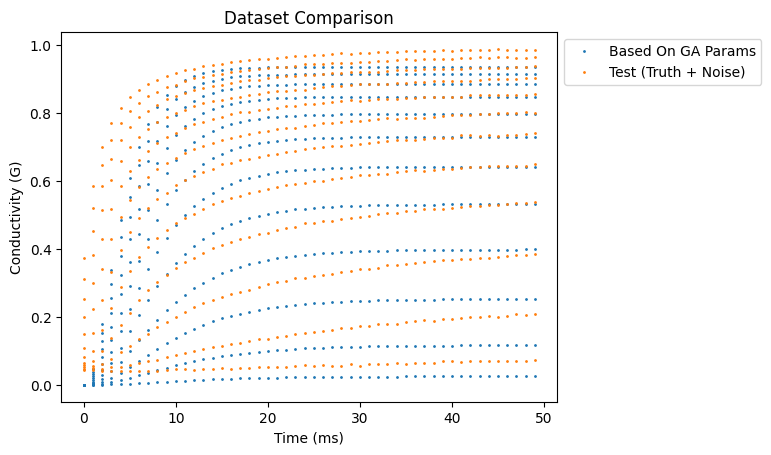

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the two dataframes
based_generated = pd.read_csv('GeneratedDataBasedGAParams/dataset_based_ga_params.csv', header=None)
based_generated = based_generated.drop(based_generated.index[0])
Test_df = pd.read_csv('DatasetTest/test.csv', header=None)
Test_df = Test_df.drop(Test_df.index[0])

based_generated.columns = ['Time', 'Temp', 'Value']
Test_df.columns = ['Time', 'Temp', 'Value']

# Convert 'Time' and 'Value' to numeric types
based_generated['Time'] = pd.to_numeric(based_generated['Time'])
based_generated['Value'] = pd.to_numeric(based_generated['Value'])
Test_df['Time'] = pd.to_numeric(Test_df['Time'])
Test_df['Value'] = pd.to_numeric(Test_df['Value'])

# Plot df1 with smaller markers
plt.plot(based_generated['Time'], based_generated['Value'], 'o', label='Based On GA Params', markersize=1)

# Plot df2 with smaller markers
plt.plot(Test_df['Time'], Test_df['Value'], 'o', label='Test (Truth + Noise)', markersize=1)

# Add title and labels
plt.title('Dataset Comparison')
plt.xlabel('Time (ms)')
plt.ylabel('Conductivity (G)')

# Adjust the legend position outside the plot and to the right side
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


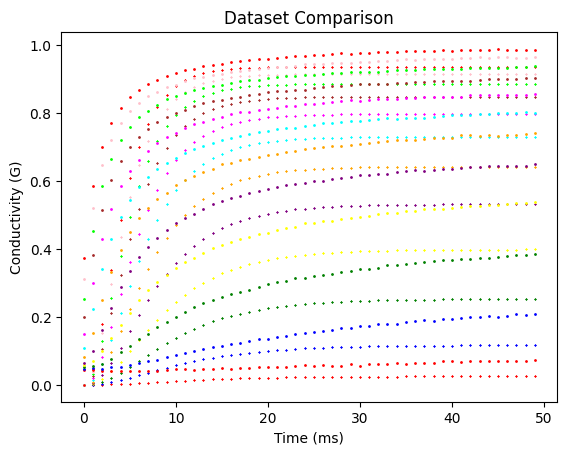

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the colors you want to use
colors = ["red", "blue", "green", "yellow", "purple", "orange", "cyan", "magenta", "brown", "lime", "pink"]

# Read the two dataframes
based_generated = pd.read_csv('GeneratedDataBasedGAParams/dataset_based_ga_params.csv', header=None)
based_generated = based_generated.drop(based_generated.index[0])
Test_df = pd.read_csv('DatasetTest/test.csv', header=None)
Test_df = Test_df.drop(Test_df.index[0])

based_generated.columns = ['Time', 'Temp', 'Value']
Test_df.columns = ['Time', 'Temp', 'Value']

# Convert 'Time', 'Temp' and 'Value' to numeric types
based_generated['Time'] = pd.to_numeric(based_generated['Time'])
based_generated['Temp'] = pd.to_numeric(based_generated['Temp'])
based_generated['Value'] = pd.to_numeric(based_generated['Value'])
Test_df['Time'] = pd.to_numeric(Test_df['Time'])
Test_df['Temp'] = pd.to_numeric(Test_df['Temp'])
Test_df['Value'] = pd.to_numeric(Test_df['Value'])

# Create a dictionary mapping Temp values to colors (wrap around the color list if more Temp values than colors)
temp_values = sorted(based_generated["Temp"].unique())
temp_color = {temp: colors[i % len(colors)] for i, temp in enumerate(temp_values)}

# Plot df1 with smaller markers
for temp in based_generated['Temp'].unique():
    plt.plot(based_generated.loc[based_generated['Temp'] == temp, 'Time'], 
             based_generated.loc[based_generated['Temp'] == temp, 'Value'], 'x', 
             label=f'Based On GA Params, Temp={temp}', 
             color=temp_color[temp], markersize=1)

# Plot df2 with smaller markers
for temp in Test_df['Temp'].unique():
    plt.plot(Test_df.loc[Test_df['Temp'] == temp, 'Time'], 
             Test_df.loc[Test_df['Temp'] == temp, 'Value'], 'o', 
             label=f'Test (Truth + Noise), Temp={temp}', 
             color=temp_color[temp], markersize=1)

# Add title and labels
plt.title('Dataset Comparison')
plt.xlabel('Time (ms)')
plt.ylabel('Conductivity (G)')


# Show the plot
plt.show()
